In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [66]:
data = pd.read_csv('resources/RSAFS.csv')[0:190]
data

,DATE,RSAFS
0,1992-01-01,164083
1,1992-02-01,164260
2,1992-03-01,163747
3,1992-04-01,164759
4,1992-05-01,165617
...,...,...
185,2007-06-01,367933
186,2007-07-01,369472
187,2007-08-01,370982
188,2007-09-01,373138


In [67]:
print(data)

           DATE   RSAFS
0    1992-01-01  164083
1    1992-02-01  164260
2    1992-03-01  163747
3    1992-04-01  164759
4    1992-05-01  165617
..          ...     ...
185  2007-06-01  367933
186  2007-07-01  369472
187  2007-08-01  370982
188  2007-09-01  373138
189  2007-10-01  375048

[190 rows x 2 columns]


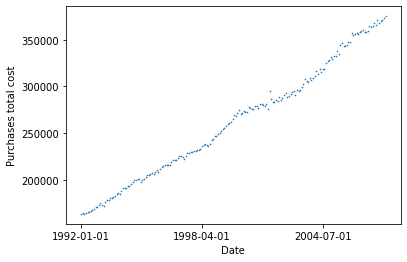

In [68]:
x = data['DATE']
y = data['RSAFS']
plt.xlabel('Date')
plt.ylabel('Purchases total cost')
plt.scatter(data['DATE'], data['RSAFS'], s=0.4)
plt.xticks(data['DATE'][::75]);

In [69]:
def calculate_m_array(y):
    temp_m = []
    m = []
    for i in range(0, len(y)):
        for j in range(0, len(temp_m)):
            if y[i] > temp_m[j]:
                if j == len(temp_m) - 1:
                    m.append(1)
            else:
                m.append(0)
                break
        temp_m.append(y[i])
    return m

In [58]:
def calculate_l_array(y):
    temp_l = []
    l = []
    for i in range(0, len(y)):
        for j in range(0, len(temp_l)):
            if y[i] < temp_l[j]:
                if j == len(temp_l) - 1:
                    l.append(1)
            else:
                l.append(0)
                break
        temp_l.append(y[i])
    return l

In [59]:
def calculate_d_array(y):
    m = calculate_m_array(y)
    l = calculate_l_array(y)
    d = [0 for _ in range(0, len(m))]
    for i in range(0, len(m)):
        d[i] = (m[i] - l[i])
    return d

In [60]:
def get_big_d_value(y):
    return np.sum(calculate_d_array(y))

In [76]:
def get_t_observable(y):
    const_sigma = 1E2
    big_d = get_big_d_value(y)
    return big_d / const_sigma

In [77]:
t_observable = get_t_observable(y)
print('Real observable value: ', t_observable)

Real observable value:  1.09


In [78]:
pd.DataFrame.from_dict({'chance': ['0.05', '0.01', '0.001'], 'value': [12.7, 63.65, 636.61]})

,chance,value
0,0.05,12.70
1,0.01,63.65
2,0.001,636.61
